<a href="https://colab.research.google.com/github/Minoo-eml/DATA-SCIENCE-PROJECT/blob/main/minooproject_bmi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDICTING WITH SMOTE AND FILLINF BMI MEANING**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

## **Reading and Cleaning Dataset**

In [47]:
stroke = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

In [48]:
stroke.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1


In [49]:
stroke.shape

(5110, 12)

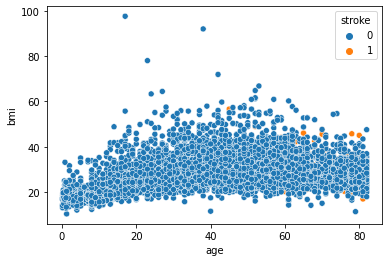

In [50]:
sns.scatterplot(x= stroke['age'] ,y=stroke['bmi'] , hue=stroke['stroke'])

In [51]:
# the count of empty values
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

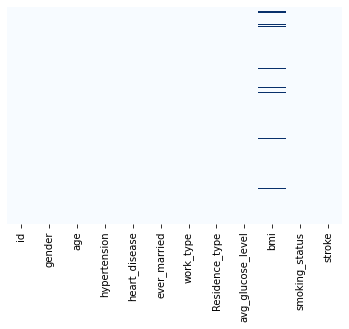

In [52]:
# showing the nun values with blue color
sns.heatmap(stroke.isnull() , yticklabels=False ,cbar=False ,cmap='Blues')

In [53]:
# filling that values that was empty be the meaning of bmi
stroke['bmi']=stroke['bmi'].fillna(stroke['bmi'].mean())

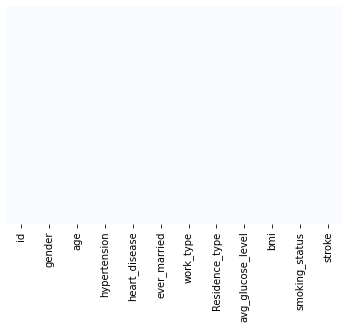

In [54]:
sns.heatmap(stroke.isnull() , yticklabels=False ,cbar=False ,cmap='Blues')

In [55]:
stroke.shape

(5110, 12)

## **predicting **

In [74]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in stroke.columns:
     stroke[col] = le.fit_transform(stroke[col])

In [75]:
stroke.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,671,1,88,0,1,1,2,1,3850,240,1,1
1,3610,0,82,0,0,1,3,0,3588,162,2,1
2,2151,1,101,0,1,1,2,0,2483,199,2,1
3,4226,0,70,0,0,1,2,1,3385,218,3,1
4,114,0,100,1,0,1,3,0,3394,113,2,1


In [76]:
x=stroke.drop('stroke' ,axis=1).values
y=stroke['stroke'].values

In [77]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , random_state=0)

In [78]:
unique, counts = np.unique( y_train, return_counts=True)
print (np.asarray((unique, counts)).T)
unique, counts = np.unique( y_test, return_counts=True)
print (np.asarray((unique, counts)).T)

[[   0 3893]
 [   1  195]]
[[  0 968]
 [  1  54]]


In [79]:
from collections import Counter
from numpy import where
import matplotlib.pyplot as plt

In [80]:
counter = Counter(y_train)

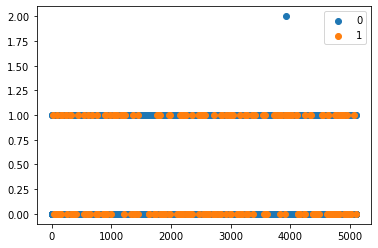

In [81]:
for label, _ in counter.items():
 row_ix = where(y_train == label)
 plt.scatter(x_train[row_ix, 0], x_train[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [82]:
from imblearn.over_sampling import SMOTE

In [83]:
sm=SMOTE(random_state=0)
X_res, y_res = sm.fit_resample(x_train,y_train)

In [84]:
unique, counts = np.unique( y_res, return_counts=True)
print (np.asarray((unique, counts)).T)
unique, counts = np.unique( y_test, return_counts=True)
print (np.asarray((unique, counts)).T)

[[   0 3893]
 [   1 3893]]
[[  0 968]
 [  1  54]]


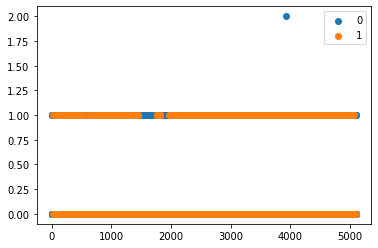

In [85]:
counter = Counter(y_res)
for label, _ in counter.items():
 row_ix = where(y_res == label)[0]
 plt.scatter(X_res[row_ix, 0], X_res[row_ix, 1], label=str(label))
plt.legend()
plt.show()

**LogesticRegration Model**

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


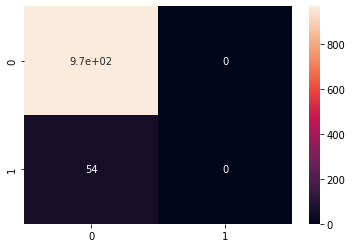

In [86]:
# we use this model before balancing ---> the prediction in our stroke = 1 is bad 
from sklearn.linear_model import LogisticRegression
lo= LogisticRegression(random_state=0)
lo.fit(x_train, y_train)
y_predict = lo.predict(x_test)
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test , y_predict)
sns.heatmap(cm, annot=True )

In [87]:
# after balancing the data ---> our result in prediction is better
from sklearn.linear_model import LogisticRegression
lo= LogisticRegression(random_state=0)
lo.fit(X_res, y_res)
y_predict = lo.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))
pd.crosstab(y_test , y_predict)

              precision    recall  f1-score   support

           0       0.97      0.75      0.84       968
           1       0.10      0.52      0.17        54

    accuracy                           0.74      1022
   macro avg       0.53      0.63      0.51      1022
weighted avg       0.92      0.74      0.81      1022



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


col_0,0,1
row_0,,
0,727,241
1,26,28


In [88]:
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test, y_predict)
a

0.738747553816047

**K_nearestneighbors**

In [89]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors = 5 , metric= 'minkowski' , p=2)
classifier.fit(X_res, y_res)
y_predict = classifier.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))
pd.crosstab(y_test , y_predict)

              precision    recall  f1-score   support

           0       0.95      0.72      0.82       968
           1       0.07      0.37      0.12        54

    accuracy                           0.70      1022
   macro avg       0.51      0.55      0.47      1022
weighted avg       0.91      0.70      0.79      1022



col_0,0,1
row_0,,
0,700,268
1,34,20


In [90]:
from sklearn.metrics import accuracy_score
b=accuracy_score(y_test, y_predict)
b

0.7045009784735812

**Decision Trees and random forest**

In [91]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators=100 , criterion='entropy')
random.fit(X_res, y_res)
y_predict= random.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))
pd.crosstab(y_test , y_predict)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       968
           1       0.10      0.11      0.10        54

    accuracy                           0.90      1022
   macro avg       0.52      0.53      0.52      1022
weighted avg       0.90      0.90      0.90      1022



col_0,0,1
row_0,,
0,911,57
1,48,6


In [92]:
from sklearn.metrics import accuracy_score
c=accuracy_score(y_test, y_predict)
c

0.8972602739726028

**Naive bayes classification**

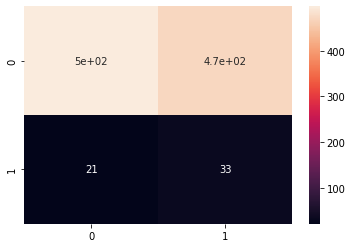

In [93]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(X_res, y_res)
y_predict=classifier.predict(x_test)
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test , y_predict)
sns.heatmap(cm, annot=True )

In [94]:
from sklearn.metrics import accuracy_score
d=accuracy_score(y_test, y_predict)
d

0.5185909980430529

**xgboost**

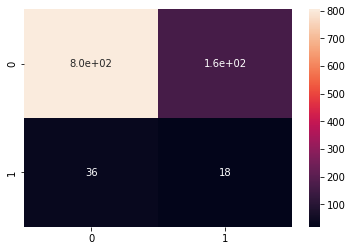

In [95]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_res, y_res)
y_predict=model.predict(x_test)
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test , y_predict)
sns.heatmap(cm, annot=True )

In [96]:
from sklearn.metrics import accuracy_score
e=accuracy_score(y_test, y_predict)
e

0.8052837573385518

**cat boost**

In [97]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Learning rate set to 0.024747
0:	learn: 0.6737225	total: 3.06ms	remaining: 3.06s
1:	learn: 0.6545493	total: 5.66ms	remaining: 2.82s
2:	learn: 0.6377926	total: 8.42ms	remaining: 2.8s
3:	learn: 0.6228984	total: 10.9ms	remaining: 2.72s
4:	learn: 0.6084418	total: 13.4ms	remaining: 2.67s
5:	learn: 0.5931810	total: 16ms	remaining: 2.64s
6:	learn: 0.5815336	total: 18.5ms	remaining: 2.62s
7:	learn: 0.5699934	total: 21ms	remaining: 2.6s
8:	learn: 0.5592085	total: 23.4ms	remaining: 2.58s
9:	learn: 0.5501244	total: 26.1ms	remaining: 2.58s
10:	learn: 0.5407617	total: 29.8ms	remaining: 2.68s
11:	learn: 0.5302254	total: 32.4ms	remaining: 2.67s
12:	learn: 0.5215710	total: 35.1ms	remaining: 2.66s
13:	learn: 0.5136837	total: 37.6ms	remaining: 2.65s
14:	learn: 0.5061069	total: 40.2ms	remaining: 2.64s
15:	learn: 0.4993394	total: 42.7ms	remaining: 2.63s
16:	learn: 0.4916662	total: 45.4ms	remaining: 2.62s
17:	learn: 0.4847064	total: 47.9ms	remaining: 2.61s
18:	learn: 0.4789002	total: 50.5ms	remaining: 2.61

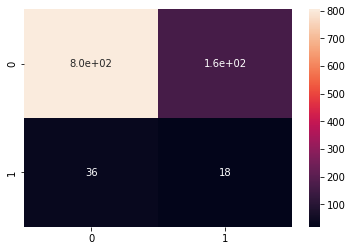

In [98]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier()
cat.fit(X_res,y_res)
y_predict=model.predict(x_test)
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test , y_predict)
sns.heatmap(cm, annot=True )

In [99]:
from sklearn.metrics import accuracy_score
f=accuracy_score(y_test, y_predict)
f

0.8052837573385518

**GaussianNB**

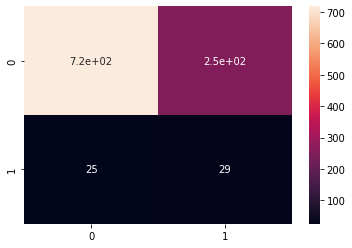

In [100]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_res,y_res)
y_predict = model.predict(x_test)
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test , y_predict)
sns.heatmap(cm, annot=True )

In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_predict))
pd.crosstab(y_test , y_predict)

              precision    recall  f1-score   support

           0       0.97      0.74      0.84       968
           1       0.10      0.54      0.17        54

    accuracy                           0.73      1022
   macro avg       0.54      0.64      0.51      1022
weighted avg       0.92      0.73      0.80      1022



col_0,0,1
row_0,,
0,718,250
1,25,29


In [102]:
from sklearn.metrics import accuracy_score
g=accuracy_score(y_test, y_predict)
g

0.7309197651663405

In [103]:
perf_measure(y_test, y_predict)

(29, 250, 718, 25)

# **Result of our prediction**

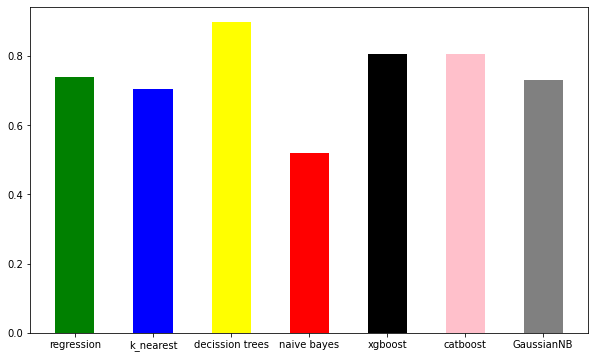

In [104]:
# totall accuracy 
plt.figure(figsize=[10,6])
left=[1,2,3,4,5,6,7]
high=[a,b,c,d,e,f,g]
tic=['regression' , 'k_nearest' , 'decission trees' , 'naive bayes', 'xgboost' , 'catboost','GaussianNB']
plt.bar(left, high ,tick_label=tic  ,width=0.5 ,color=['green' , 'blue' ,'yellow' ,'red','black','pink','gray'])
plt.show()

In [105]:
from sklearn import datasets
from sklearn.metrics import roc_curve, roc_auc_score

In [106]:
rf_predict=lo.predict(x_test)
nb_predict=classifier.predict(x_test)
lg_predict=random.predict(x_test)
kn_predict=classifier.predict(x_test)
xg_predict=model.predict(x_test)
ca_predict=cat.predict(x_test)
ga_predict=model.predict(x_test)

In [107]:
rf_auc=roc_auc_score(y_test,rf_predict)
nb_auc=roc_auc_score(y_test,nb_predict)
lg_auc=roc_auc_score(y_test,lg_predict)
kn_auc=roc_auc_score(y_test,kn_predict)
xg_auc=roc_auc_score(y_test,xg_predict)
ca_auc=roc_auc_score(y_test,ca_predict)
ga_auc=roc_auc_score(y_test,ga_predict)

In [108]:
rf_fpr,rf_tpr,_ =roc_curve(y_test,rf_predict)
nb_fpr,nb_tpr,_ =roc_curve(y_test,nb_predict)
lg_fpr,lg_tpr,_ =roc_curve(y_test,lg_predict)
kn_fpr,kn_tpr,_ =roc_curve(y_test,kn_predict)
xg_fpr,xg_tpr,_ =roc_curve(y_test,xg_predict)
ca_fpr,ca_tpr,_ =roc_curve(y_test,ca_predict)
ga_fpr,ga_tpr,_ =roc_curve(y_test,ga_predict)


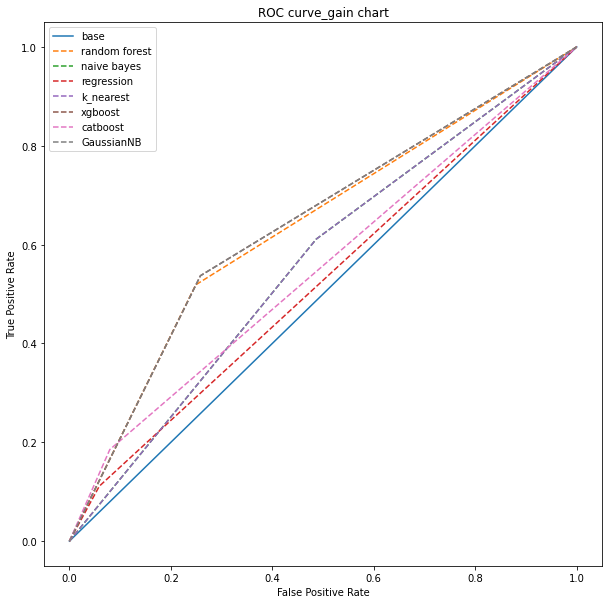

In [109]:
plt.subplots(1, figsize=(10,10))
r=[0,0.5,1]
p=r
plt.plot(r,p , linestyle='-', label='base')
plt.plot(rf_fpr,rf_tpr , linestyle='--' , label='random forest')
plt.plot(nb_fpr,nb_tpr , linestyle='--' , label='naive bayes')
plt.plot(lg_fpr,lg_tpr , linestyle='--' , label='regression')
plt.plot(kn_fpr,kn_tpr , linestyle='--' , label='k_nearest')
plt.plot(xg_fpr,xg_tpr , linestyle='--' , label='xgboost')
plt.plot(ca_fpr,ca_tpr , linestyle='--' , label='catboost')
plt.plot(ga_fpr,ga_tpr , linestyle='--' , label='GaussianNB')


plt.title('ROC curve_gain chart')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

# **useful functions**

In [68]:
from sklearn.metrics import classification_report ,confusion_matrix 

In [69]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1
    return(TP, FP, TN, FN)

In [70]:
def truepositive(y_actual, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_actual, y_pred).ravel()
    return(tp)